In [1]:
import numpy as np
import pandas as pd
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats

## Functions

In [5]:
def all_coverage_results():
    """ Compute empirical OOB_quantile for different confidence levels. """
    coverage_df = pd.DataFrame(columns=['sample_index', 'train_size', 'sigma', 'OOB_quantile', 'pb_i_cov', 'pb_ii_cov', 'pb_iii_cov', 'pb_iv_cov',
     'conf_i_cov', 'conf_ii_cov', 'conf_iii_cov', 'conf_iv_cov'])
    i = 0
    for file in os.listdir(os.path.join(os.getcwd(), 'results')):
        if (file.endswith('.npy')):
            print(i)
            i+=1
            infile=open(os.path.join(os.getcwd(), 'results/' + file), 'rb')
            result=np.load(infile, allow_pickle=True).item()
            infile.close()
        else:
            continue
        coverage_df = pd.concat([coverage_df, pd.DataFrame({
            'sample_index': int(file.split('_')[1][4:]),
            'train_size': int(file.split('_')[2][1:]),
            'sigma': file.split('_')[3][5:],
            'pb_i_cov': [result['pb_i_cov']],
            'pb_ii_cov': [result['pb_ii_cov']],
            'pb_iii_cov': [result['pb_iii_cov']],
            'pb_iv_cov': [result['pb_iv_cov']],
            'conf_i_cov': [result['conf_i_cov']],
            'conf_ii_cov': [result['conf_ii_cov']],
            'conf_iii_cov': [result['conf_iii_cov']],
            'conf_iv_cov': [result['conf_iv_cov']],
            'pb_mse': [result['pb_mse']],
            'conf_mse': [result['conf_mse']],
            'OOB_quantile': [result['OOB_quantile']],
            'quantile': [result['quantile']],
            'pb_time': [result['pb_time']],
            'conf_time': [result['conf_time']]
        }, index=pd.RangeIndex(0, 1))], ignore_index=True)

    coverage_df['train_size'] = coverage_df['train_size'].astype('category')
    coverage_df['sigma'] = coverage_df.sigma.astype('category')
    return coverage_df


# Parameters
sample_sizes = [50, 100, 200, 500]  # Sample sizes
sigma_values = [0.9, 1.7]  # Concentration parameters

Prediction balls

In [6]:
# Define confidence levels
np.random.seed(1000)
sign_level = np.array([0.01, 0.05, 0.1])
# Load stored results
coverage_df=all_coverage_results()
coverage_df.head()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

,sample_index,train_size,sigma,OOB_quantile,pb_i_cov,pb_ii_cov,pb_iii_cov,pb_iv_cov,conf_i_cov,conf_ii_cov,conf_iii_cov,conf_iv_cov,pb_mse,conf_mse,quantile,pb_time,conf_time
0,68,100,0.9,"[2.6799393800313505, 2.038110179736492, 1.6629...","[[True, True, True], [True, True, False], [Tru...","[0.989, 0.932, 0.857]","[[True, True, True], [True, True, True], [True...","[0.995, 0.959, 0.901]","[[True, True, True], [True, True, True], [True...","[0.999, 0.913, 0.884]","[[True, True, True], [True, True, True], [True...","[0.999, 0.98, 0.969]",1.193827,1.502538,"[3.8947289180605167, 2.1649746473465576, 1.989...",8.561086,8.520170
1,433,200,1.7,"[4.0372827735850745, 3.291036170002433, 2.9511...","[[True, True, True], [True, True, True], [True...","[0.976, 0.934, 0.902]","[[True, True, True], [True, True, True], [True...","[0.941, 0.885, 0.846]","[[True, True, True], [True, True, True], [True...","[0.991, 0.939, 0.905]","[[True, True, True], [True, True, True], [True...","[0.978, 0.923, 0.887]",3.264532,3.298275,"[4.701241506434357, 3.4648275023892765, 3.0884...",10.399907,10.072229
2,793,50,1.7,"[3.7601024994372474, 3.27355925823164, 2.95993...","[[True, True, True], [True, True, True], [True...","[0.903, 0.857, 0.809]","[[True, True, True], [True, True, True], [True...","[0.947, 0.899, 0.868]","[[True, True, True], [True, True, True], [True...","[0.957, 0.921, 0.888]","[[True, True, True], [True, True, True], [True...","[0.968, 0.928, 0.89]",5.018671,4.166049,"[4.12035871849366, 3.5517642526936783, 3.19981...",8.969089,8.615814
3,80,500,1.7,"[4.890836590440899, 3.7853150484200464, 2.9383...","[[True, True, True], [True, True, True], [True...","[0.992, 0.969, 0.901]","[[True, True, True], [True, True, True], [True...","[0.995, 0.974, 0.91]","[[True, True, True], [True, True, True], [True...","[0.982, 0.971, 0.921]","[[True, True, True], [True, True, True], [True...","[0.992, 0.981, 0.931]",3.222868,3.374854,"[4.592047299907626, 4.038632696291151, 3.17308...",10.035554,9.773598
4,326,200,0.9,"[2.5447629118891966, 1.7980453684145972, 1.445...","[[True, True, True], [True, True, True], [True...","[0.993, 0.942, 0.864]","[[True, True, True], [True, True, True], [True...","[0.994, 0.959, 0.901]","[[True, True, True], [True, True, True], [True...","[0.98, 0.922, 0.893]","[[True, True, True], [True, True, True], [True...","[0.996, 0.961, 0.931]",1.014652,1.307973,"[2.5635136628194717, 1.8990523715166028, 1.722...",10.351314,10.022843


# TYPE I

In [ ]:
import pandas as pd
import numpy as np

def calculate_type_i_coverage(coverage_df, sample_sizes, sigma_values, B=500, random_seed=1):
    """
    Calculate Type I coverage using bootstrap procedure.
    
    Parameters:
    -----------
    pb_coverage_df : DataFrame
        Coverage results dataframe
    sample_sizes : list
        List of sample sizes to analyze
    kappa_values : list
        List of kappa values to analyze
    B : int
        Number of bootstrap replicates (default: 1000)
    
    Returns:
    --------
    dict : Bootstrap results with means and standard deviations
    """

    if random_seed is not None:
        np.random.seed(random_seed)
    
    pb_diccionario_i = {
        'sigma_0.9': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '500': {'means': np.zeros(3), 'stds': np.zeros(3)}},
        'sigma_1.7': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '500': {'means': np.zeros(3), 'stds': np.zeros(3)}}
    }

    conf_diccionario_i = {
        'sigma_0.9': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '500': {'means': np.zeros(3), 'stds': np.zeros(3)}},
        'sigma_1.7': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '500': {'means': np.zeros(3), 'stds': np.zeros(3)}}
    }

    for N in sample_sizes:
        for sigma in sigma_values:
            print(f"Processing N={N}, sigma={sigma}")

            # Filter data for current N and sigma
            coverage_df_N_sigma = coverage_df[
                (coverage_df['sigma'] == str(sigma)) & 
                (coverage_df['train_size'] == N)
            ]

            # Get M (number of samples for this N, sigma combination) and assert it is 1000
            M = len(coverage_df_N_sigma)
            print(M)
            #assert M == 1000, f"Expected M to be 1000, but got {M} for N={N}, sigma={sigma}"

            pb_coverages = []
            conf_coverages = []

            for m in range(M):
                # Extract row j_m^(b) of the dataset (training sample)
                training_sample_idx = m
                training_sample = coverage_df_N_sigma.iloc[training_sample_idx]

                # Extract element i_m^(b) from the i_cov column (test pair)
                test_pair_idx = m
                pb_coverage_for_this_pair = training_sample['pb_i_cov'][test_pair_idx, :]  # Shape: (3,)
                conf_coverage_for_this_pair = training_sample['conf_i_cov'][test_pair_idx, :]  # Shape: (3,)

                pb_coverages.append(pb_coverage_for_this_pair)
                conf_coverages.append(conf_coverage_for_this_pair)

            pb_coverages = np.array(pb_coverages)  # Shape: (M, 3)
            conf_coverages = np.array(conf_coverages)  # Shape: (M, 3)

            p_hat_M = np.mean(pb_coverages, axis=0)  # Shape: (3,)
            conf_hat_M = np.mean(conf_coverages, axis=0)  # Shape:


            # Bootstrap procedure
            pb_bootstrap_estimates = []  # Will store B bootstrap estimates
            conf_bootstrap_estimates = []
            
            for b in range(B):
                # Sample M indices for test pairs (i_1^(b), ..., i_M^(b))
                i_indices = np.random.choice(M, size=M, replace=True)
                
                # Sample M indices for training samples (j_1^(b), ..., j_M^(b))
                j_indices = np.random.choice(M, size=M, replace=True)
                
                # Extract bootstrap sample
                pb_bootstrap_coverages = []
                conf_bootstrap_coverages = []

                for m in range(M):
                    # Extract row j_m^(b) of the dataset (training sample)
                    training_sample_idx = j_indices[m]
                    training_sample = coverage_df_N_sigma.iloc[training_sample_idx]

                    # Extract element i_m^(b) from the i_cov column (test pair)
                    test_pair_idx = i_indices[m]
                    pb_coverage_for_this_pair = training_sample['pb_i_cov'][test_pair_idx, :]  # Shape: (3,)
                    conf_coverage_for_this_pair = training_sample['conf_i_cov'][test_pair_idx, :]  # Shape: (3,)

                    pb_bootstrap_coverages.append(pb_coverage_for_this_pair)
                    conf_bootstrap_coverages.append(conf_coverage_for_this_pair)

                # Convert to array and compute mean across the M bootstrap samples
                pb_bootstrap_coverages = np.array(pb_bootstrap_coverages)  # Shape: (M, 3)
                p_hat_M_b = np.mean(pb_bootstrap_coverages, axis=0)  # Shape: (3,)

                conf_bootstrap_coverages = np.array(conf_bootstrap_coverages)  # Shape: (M, 3)
                conf_hat_M_b = np.mean(conf_bootstrap_coverages, axis=0)
                
                pb_bootstrap_estimates.append(p_hat_M_b)
                conf_bootstrap_estimates.append(conf_hat_M_b)

            # Convert bootstrap estimates to array
            pb_bootstrap_estimates = np.array(pb_bootstrap_estimates)  # Shape: (B, 3)
            conf_bootstrap_estimates = np.array(conf_bootstrap_estimates)  # Shape: (B, 3


            # Compute overall mean and standard deviation
            #p_bar_M = np.mean(pb_bootstrap_estimates, axis=0)  # Shape: (3,)
            sigma_boot = np.std(pb_bootstrap_estimates, axis=0, ddof=1)  # Shape: (3,)

            #conf_bar_M = np.mean(conf_bootstrap_estimates, axis=0)  # Shape: (3,)
            conf_sigma_boot = np.std(conf_bootstrap_estimates, axis=0, ddof=1)  # Shape: (3,)

            # Store results
            sigma_key = f'sigma_{sigma}'
            N_key = str(N)
            pb_diccionario_i[sigma_key][N_key]['means'] = p_hat_M
            pb_diccionario_i[sigma_key][N_key]['stds'] = sigma_boot

            conf_diccionario_i[sigma_key][N_key]['means'] = conf_hat_M
            conf_diccionario_i[sigma_key][N_key]['stds'] = conf_sigma_boot
            # Print results
            print(f"PB Bootstrap means: {p_hat_M}")
            print(f"PB Bootstrap stds: {sigma_boot}")

            print(f"Conformal means: {conf_hat_M}")
            print(f"Conformal stds: {conf_sigma_boot}")
    
    return pb_diccionario_i, conf_diccionario_i

# Usage
sample_sizes = [50, 100, 200, 500]
sigma_values = [0.9, 1.7]  # Concentration parameters

pb_diccionario_i, conf_diccionario_i = calculate_type_i_coverage(
    coverage_df=coverage_df, 
    sample_sizes=sample_sizes, 
    sigma_values=sigma_values,
    B=500,  # Number of bootstrap replicates
    random_seed=1  # Optional: set a random seed for reproducibility
)

Processing N=50, sigma=0.9
1000
PB Bootstrap means: [0.983 0.947 0.894]
PB Bootstrap stds: [0.00388211 0.0071242  0.01018617]
Conformal means: [0.961 0.936 0.9  ]
Conformal stds: [0.00579174 0.00797362 0.00983847]
Processing N=50, sigma=1.7
1000
PB Bootstrap means: [0.974 0.933 0.876]
PB Bootstrap stds: [0.00470301 0.00793947 0.01021341]
Conformal means: [0.96  0.925 0.893]
Conformal stds: [0.00595299 0.00846409 0.01026531]
Processing N=100, sigma=0.9
1000
PB Bootstrap means: [0.981 0.94  0.898]
PB Bootstrap stds: [0.0043     0.00757646 0.00966545]
Conformal means: [0.977 0.938 0.887]
Conformal stds: [0.00453659 0.00731036 0.0096963 ]
Processing N=100, sigma=1.7
1000
PB Bootstrap means: [0.982 0.943 0.882]
PB Bootstrap stds: [0.00433774 0.00751514 0.01004868]
Conformal means: [0.979 0.955 0.888]
Conformal stds: [0.00409239 0.00722693 0.01007879]
Processing N=200, sigma=0.9
1000
PB Bootstrap means: [0.982 0.931 0.875]
PB Bootstrap stds: [0.00395572 0.00778769 0.01043605]
Conformal means

Prediction balls

In [12]:
# Prepare data for the DataFrame
pb_rows = []
index = []

for sigma in [0.9, 1.7]:
    for N in [50, 100, 200, 500]:
        pb_row = []
        pb_means = pb_diccionario_i[f'sigma_{sigma}'][str(N)]['means']
        pb_stds = pb_diccionario_i[f'sigma_{sigma}'][str(N)]['stds']
        # Format as "mean (std)"
        pb_formatted_values = [f"{100*pb_means[i]:.1f} ({100*pb_stds[i]:.2f})" for i in range(3)]
        pb_row.extend(pb_formatted_values)
        pb_rows.append(pb_row)
        index.append((f"{sigma}", f"{N}"))

# MultiIndex for rows and columns
row_index = pd.MultiIndex.from_tuples(index, names=["sigma", "N"])
col_index = pd.MultiIndex.from_product(
    [["0.01", "0.05", "0.1"]],
    names=[r"Significance Level"]
)

# Create the DataFrame
pb_df = pd.DataFrame(pb_rows, index=row_index, columns=col_index)

# Display the DataFrame
pb_df

Significance Level         0.01         0.05          0.1
sigma N                                                  
0.9   50            98.3 (0.39)  94.7 (0.71)  89.4 (1.02)
      100           98.1 (0.43)  94.0 (0.76)  89.8 (0.97)
      200           98.2 (0.40)  93.1 (0.78)  87.5 (1.04)
      500           98.8 (0.34)  95.0 (0.65)  90.4 (0.92)
1.7   50            97.4 (0.47)  93.3 (0.79)  87.6 (1.02)
      100           98.2 (0.43)  94.3 (0.75)  88.2 (1.00)
      200           98.6 (0.37)  94.5 (0.68)  90.1 (0.93)
      500           99.1 (0.37)  95.0 (0.74)  90.1 (0.90)

In [11]:
import pandas as pd
import numpy as np
from scipy import stats

def format_cell(value, target_coverage=0.95, n_trials=1000, confidence_level=0.95):
    """
    Format cell with underline if mean coverage falls outside binomial proportion CI
    
    Parameters:
    value: string in format "mean (std)"
    target_coverage: expected coverage (0.99, 0.95, or 0.90)
    n_trials: number of trials (1000)
    confidence_level: confidence level for CI (0.95 for 95%)
    """
    pb_mean, pb_std = value.split(" ")
    mean_val = float(pb_mean) / 100.0  # Convert percentage back to proportion
    pb_mean = f"{float(pb_mean):.1f}"
    pb_std = pb_std.strip("()")
    pb_std = f"({float(pb_std):.2f})"
    
    # Calculate expected number of successes for target coverage
    expected_successes = int(target_coverage * n_trials)
    
    # Use scipy.stats.binomtest to get proportion confidence interval
    binom_result = stats.binomtest(expected_successes, n_trials)
    lower_bound, upper_bound = binom_result.proportion_ci(confidence_level=confidence_level)
    
    # Check if mean falls outside the confidence interval
    if mean_val < lower_bound or mean_val > upper_bound:
        # Underline the mean value in LaTeX
        pb_mean = f"\\underline{{{pb_mean}}}"
    
    return f"{pb_mean} {pb_std}"

# Define target coverage values that correspond to each column
# Column 0 (0.01): 0.99, Column 1 (0.05): 0.95, Column 2 (0.1): 0.90
target_coverages = [0.99, 0.95, 0.90]

# Apply formatting with column-specific target coverage
pb_latex = pb_df.copy()
for col_idx, col in enumerate(pb_df.columns):
    # Use the target coverage corresponding to this column
    target_coverage = target_coverages[col_idx]
    
    for row_idx in pb_df.index:
        pb_latex.loc[row_idx, col] = format_cell(
            pb_df.loc[row_idx, col], 
            target_coverage=target_coverage, 
            n_trials=1000
        )

pb_latex

Significance Level                     0.01                     0.05  \
sigma N                                                                
0.9   50                        98.3 (0.39)              94.7 (0.71)   
      100           \underline{98.1} (0.43)              94.0 (0.76)   
      200                       98.2 (0.40)  \underline{93.1} (0.78)   
      500                       98.8 (0.34)              95.0 (0.65)   
1.7   50            \underline{97.4} (0.47)  \underline{93.3} (0.79)   
      100                       98.2 (0.43)              94.3 (0.75)   
      200                       98.6 (0.37)              94.5 (0.68)   
      500                       99.1 (0.37)              95.0 (0.74)   

Significance Level                      0.1  
sigma N                                      
0.9   50                        89.4 (1.02)  
      100                       89.8 (0.97)  
      200           \underline{87.5} (1.04)  
      500                       90.4 (0.92)  
1.7   50            \underline{87.6} (1.02)  
      100                       88.2 (1.00)  
      200                       90.1 (0.93)  
      500                       90.1 (0.90)

In [13]:
print(pb_latex.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type I error', label='tab:pbtypeIerrorcoverage'))

\begin{table}
\caption{Type I error}
\label{tab:pbtypeIerrorcoverage}
\begin{tabular}{lllll}
\toprule
 & Significance Level & ('0.01',) & ('0.05',) & ('0.1',) \\
sigma & N &  &  &  \\
\midrule
\multirow[t]{4}{*}{0.9} & 50 & 98.3 (0.39) & 94.7 (0.71) & 89.4 (1.02) \\
 & 100 & \underline{98.1} (0.43) & 94.0 (0.76) & 89.8 (0.97) \\
 & 200 & 98.2 (0.40) & \underline{93.1} (0.78) & \underline{87.5} (1.04) \\
 & 500 & 98.8 (0.34) & 95.0 (0.65) & 90.4 (0.92) \\
\cline{1-5}
\multirow[t]{4}{*}{1.7} & 50 & \underline{97.4} (0.47) & \underline{93.3} (0.79) & \underline{87.6} (1.02) \\
 & 100 & 98.2 (0.43) & 94.3 (0.75) & 88.2 (1.00) \\
 & 200 & 98.6 (0.37) & 94.5 (0.68) & 90.1 (0.93) \\
 & 500 & 99.1 (0.37) & 95.0 (0.74) & 90.1 (0.90) \\
\cline{1-5}
\bottomrule
\end{tabular}
\end{table}



Split-conformal

In [14]:
# Prepare data for the DataFrame
conf_rows = []
index = []

for sigma in [0.9, 1.7]:
    for N in [50, 100, 200, 500]:
        conf_row = []
        conf_means = conf_diccionario_i[f'sigma_{sigma}'][str(N)]['means']
        conf_stds = conf_diccionario_i[f'sigma_{sigma}'][str(N)]['stds']
        # Format as "mean (std)"
        conf_formatted_values = [f"{100*conf_means[i]:.2f} ({100*conf_stds[i]:.2f})" for i in range(3)]
        conf_row.extend(conf_formatted_values)
        conf_rows.append(conf_row)
        index.append((f"{sigma}", f"{N}"))

# MultiIndex for rows and columns
row_index = pd.MultiIndex.from_tuples(index, names=["sigma", "N"])
col_index = pd.MultiIndex.from_product(
    [["0.01", "0.05", "0.1"]],
    names=[r"Significance Level"]
)

# Create the DataFrame
conf_df = pd.DataFrame(conf_rows, index=row_index, columns=col_index)

# Display the DataFrame
conf_df

Significance Level          0.01          0.05           0.1
sigma N                                                     
0.9   50            96.10 (0.58)  93.60 (0.80)  90.00 (0.98)
      100           97.70 (0.45)  93.80 (0.73)  88.70 (0.97)
      200           97.70 (0.46)  93.60 (0.77)  88.40 (1.07)
      500           98.70 (0.35)  95.40 (0.70)  89.40 (0.98)
1.7   50            96.00 (0.60)  92.50 (0.85)  89.30 (1.03)
      100           97.90 (0.41)  95.50 (0.72)  88.80 (1.01)
      200           98.40 (0.41)  94.60 (0.71)  88.80 (0.95)
      500           98.70 (0.37)  94.80 (0.73)  89.70 (0.95)

In [15]:
# Apply formatting with column-specific target coverage
conf_latex = conf_df.copy()
for col_idx, col in enumerate(conf_df.columns):
    # Use the target coverage corresponding to this column
    target_coverage = target_coverages[col_idx]
    
    for row_idx in conf_df.index:
        conf_latex.loc[row_idx, col] = format_cell(
            conf_df.loc[row_idx, col],
            target_coverage=target_coverage,
            n_trials=1000
        )

conf_latex

Significance Level                     0.01                     0.05  \
sigma N                                                                
0.9   50            \underline{96.1} (0.58)              93.6 (0.80)   
      100           \underline{97.7} (0.45)              93.8 (0.73)   
      200           \underline{97.7} (0.46)              93.6 (0.77)   
      500                       98.7 (0.35)              95.4 (0.70)   
1.7   50            \underline{96.0} (0.60)  \underline{92.5} (0.85)   
      100           \underline{97.9} (0.41)              95.5 (0.72)   
      200                       98.4 (0.41)              94.6 (0.71)   
      500                       98.7 (0.37)              94.8 (0.73)   

Significance Level          0.1  
sigma N                          
0.9   50            90.0 (0.98)  
      100           88.7 (0.97)  
      200           88.4 (1.07)  
      500           89.4 (0.98)  
1.7   50            89.3 (1.03)  
      100           88.8 (1.01)  
      200           88.8 (0.95)  
      500           89.7 (0.95)

In [16]:
print(conf_latex.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type I error', label='tab:conftypeIerrorcoverage'))

\begin{table}
\caption{Type I error}
\label{tab:conftypeIerrorcoverage}
\begin{tabular}{lllll}
\toprule
 & Significance Level & ('0.01',) & ('0.05',) & ('0.1',) \\
sigma & N &  &  &  \\
\midrule
\multirow[t]{4}{*}{0.9} & 50 & \underline{96.1} (0.58) & 93.6 (0.80) & 90.0 (0.98) \\
 & 100 & \underline{97.7} (0.45) & 93.8 (0.73) & 88.7 (0.97) \\
 & 200 & \underline{97.7} (0.46) & 93.6 (0.77) & 88.4 (1.07) \\
 & 500 & 98.7 (0.35) & 95.4 (0.70) & 89.4 (0.98) \\
\cline{1-5}
\multirow[t]{4}{*}{1.7} & 50 & \underline{96.0} (0.60) & \underline{92.5} (0.85) & 89.3 (1.03) \\
 & 100 & \underline{97.9} (0.41) & 95.5 (0.72) & 88.8 (1.01) \\
 & 200 & 98.4 (0.41) & 94.6 (0.71) & 88.8 (0.95) \\
 & 500 & 98.7 (0.37) & 94.8 (0.73) & 89.7 (0.95) \\
\cline{1-5}
\bottomrule
\end{tabular}
\end{table}



# TYPE II

### sigma 0.9

In [17]:
ii_coverage_df_sigma_09_alpha_01 = coverage_df[coverage_df['sigma'] == '0.9'].copy()
ii_coverage_df_sigma_09_alpha_05 = coverage_df[coverage_df['sigma'] == '0.9'].copy()
ii_coverage_df_sigma_09_alpha_1  = coverage_df[coverage_df['sigma'] == '0.9'].copy()

ii_coverage_df_sigma_09_alpha_01['pb_ii_cov']  = coverage_df[coverage_df['sigma'] == '0.9']['pb_ii_cov'].apply(lambda x: x[0])
ii_coverage_df_sigma_09_alpha_01['conf_ii_cov']  = coverage_df[coverage_df['sigma'] == '0.9']['conf_ii_cov'].apply(lambda x: x[0])
ii_coverage_df_sigma_09_alpha_01['OOB_quantile'] = coverage_df[coverage_df['sigma'] == '0.9']['OOB_quantile'].apply(lambda x: x[0])
ii_coverage_df_sigma_09_alpha_01['quantile'] = coverage_df[coverage_df['sigma'] == '0.9']['quantile'].apply(lambda x: x[0])

ii_coverage_df_sigma_09_alpha_05['pb_ii_cov']  = coverage_df[coverage_df['sigma'] == '0.9']['pb_ii_cov'].apply(lambda x: x[1])
ii_coverage_df_sigma_09_alpha_05['conf_ii_cov']  = coverage_df[coverage_df['sigma'] == '0.9']['conf_ii_cov'].apply(lambda x: x[1])
ii_coverage_df_sigma_09_alpha_05['OOB_quantile'] = coverage_df[coverage_df['sigma'] == '0.9']['OOB_quantile'].apply(lambda x: x[1])
ii_coverage_df_sigma_09_alpha_05['quantile'] = coverage_df[coverage_df['sigma'] == '0.9']['quantile'].apply(lambda x: x[1])

ii_coverage_df_sigma_09_alpha_1['pb_ii_cov']  = coverage_df[coverage_df['sigma'] == '0.9']['pb_ii_cov'].apply(lambda x: x[2])
ii_coverage_df_sigma_09_alpha_1['conf_ii_cov']  = coverage_df[coverage_df['sigma'] == '0.9']['conf_ii_cov'].apply(lambda x: x[2])
ii_coverage_df_sigma_09_alpha_1['OOB_quantile'] = coverage_df[coverage_df['sigma'] == '0.9']['OOB_quantile'].apply(lambda x: x[2])
ii_coverage_df_sigma_09_alpha_1['quantile'] = coverage_df[coverage_df['sigma'] == '0.9']['quantile'].apply(lambda x: x[2])

ii_coverage_df_sigma_09_alpha_01.head()
ii_coverage_df_sigma_09_alpha_05.head()
ii_coverage_df_sigma_09_alpha_1.head()

,sample_index,train_size,sigma,OOB_quantile,pb_i_cov,pb_ii_cov,pb_iii_cov,pb_iv_cov,conf_i_cov,conf_ii_cov,conf_iii_cov,conf_iv_cov,pb_mse,conf_mse,quantile,pb_time,conf_time
0,68,100,0.9,1.662912,"[[True, True, True], [True, True, False], [Tru...",0.857,"[[True, True, True], [True, True, True], [True...","[0.995, 0.959, 0.901]","[[True, True, True], [True, True, True], [True...",0.884,"[[True, True, True], [True, True, True], [True...","[0.999, 0.98, 0.969]",1.193827,1.502538,1.989348,8.561086,8.520170
4,326,200,0.9,1.445453,"[[True, True, True], [True, True, True], [True...",0.864,"[[True, True, True], [True, True, True], [True...","[0.994, 0.959, 0.901]","[[True, True, True], [True, True, True], [True...",0.893,"[[True, True, True], [True, True, True], [True...","[0.996, 0.961, 0.931]",1.014652,1.307973,1.722313,10.351314,10.022843
5,537,50,0.9,1.722645,"[[True, True, True], [True, True, True], [True...",0.858,"[[True, True, True], [True, True, True], [True...","[0.999, 0.991, 0.917]","[[True, True, True], [True, True, True], [True...",0.880,"[[True, True, True], [True, True, True], [True...","[0.997, 0.995, 0.955]",1.178285,1.448009,1.953385,10.049529,9.972960
7,216,50,0.9,2.027087,"[[True, True, True], [True, True, True], [True...",0.938,"[[True, True, True], [True, True, True], [True...","[1.0, 0.985, 0.979]","[[True, True, True], [True, True, True], [True...",0.958,"[[True, True, True], [True, True, True], [True...","[1.0, 0.99, 0.972]",1.274390,1.760215,2.535507,9.569995,9.243333
9,834,200,0.9,1.656429,"[[True, True, True], [True, True, True], [True...",0.894,"[[True, True, True], [True, True, True], [True...","[0.996, 0.975, 0.923]","[[True, True, True], [True, True, True], [True...",0.911,"[[True, True, True], [True, True, True], [True...","[0.999, 0.994, 0.977]",0.999896,1.341235,2.109176,9.734164,9.150361


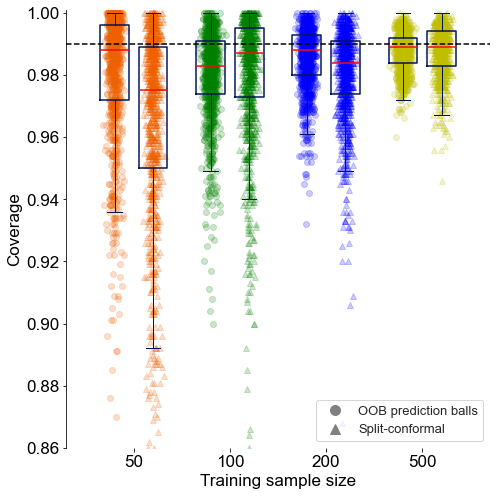

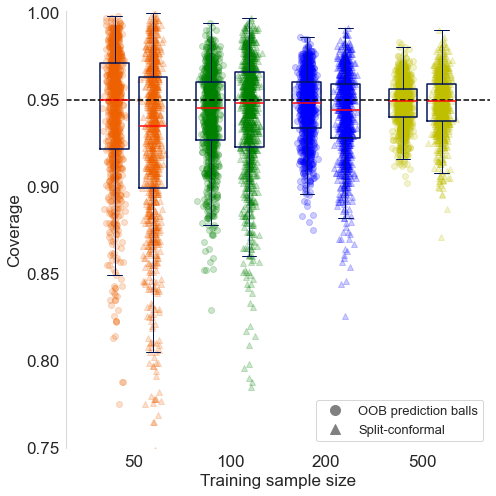

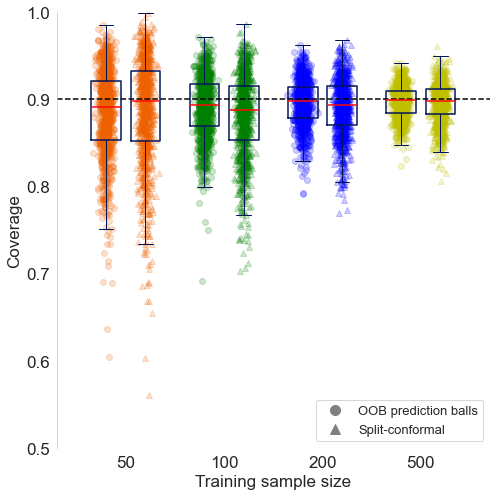

In [18]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

##### Set style options here #####
boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
flierprops = dict(marker='o', markersize=1, linestyle='none')
whiskerprops = dict(color='#00145A')
capprops = dict(color='#00145A')
medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')
palette = ['#ee6100', 'g', 'b', 'y']

for sigma_data, alpha_level in zip(
    [ii_coverage_df_sigma_09_alpha_01, ii_coverage_df_sigma_09_alpha_05, ii_coverage_df_sigma_09_alpha_1], 
    [0.01, 0.05, 0.1]
):
    fig = plt.figure(facecolor="white", figsize=(7, 7))
    ax = fig.add_subplot(111)

    # Extract data for each training size
    train_sizes = [50, 100, 200, 500]
    pb_sigma_boxplot_data = [sigma_data[sigma_data['train_size'] == size]['pb_ii_cov'].values for size in train_sizes]
    conf_sigma_boxplot_data = [sigma_data[sigma_data['train_size'] == size]['conf_ii_cov'].values for size in train_sizes]

    # Create boxplots with adjusted positions
    pb_positions_sigma = np.array(range(len(train_sizes))) - 0.2
    conf_positions_sigma = np.array(range(len(train_sizes))) + 0.2

    ax.boxplot(pb_sigma_boxplot_data, positions=pb_positions_sigma, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               flierprops=dict(marker='o', markersize=1, linestyle='none'), 
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False, showfliers=False)
               
    ax.boxplot(conf_sigma_boxplot_data, positions=conf_positions_sigma, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               flierprops=dict(marker='o', markersize=1, linestyle='none'), 
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False, showfliers=False)

    # Scatter plot
    pb_palette_sigma = ['#ee6100', 'g', 'b', 'y']
    conf_palette_sigma = ['#ee6100', 'g', 'b', 'y']

    for i, size in enumerate(train_sizes):
        pb_xs_sigma = np.random.normal(pb_positions_sigma[i], 0.04, len(pb_sigma_boxplot_data[i]))
        conf_xs_sigma = np.random.normal(conf_positions_sigma[i], 0.04, len(conf_sigma_boxplot_data[i]))

        ax.scatter(pb_xs_sigma, pb_sigma_boxplot_data[i], alpha=0.2, color = pb_palette_sigma[i], label='Prediction balls')
        ax.scatter(conf_xs_sigma, conf_sigma_boxplot_data[i], alpha=0.2, color = conf_palette_sigma[i], marker='^', label='Split-conformal')

    sns.despine(bottom=True)  # Remove right and top axis lines
    sns.set_style("whitegrid")
    ax.set_xticks(range(len(train_sizes)))
    ax.set_xticklabels([str(size) for size in train_sizes], fontsize=17)

    if alpha_level == 0.01:
        ax.set_ylim(0.86, 1.001)
    elif alpha_level == 0.05:
        ax.set_ylim(0.75, 1.001)
    else:
        ax.set_ylim(0.5, 1)

    ax.set_xlabel('Training sample size', fontsize=17)
    ax.set_ylabel('Coverage', fontsize=17)
    ax.tick_params(labelsize=17)
    ax.axhline(y=1-alpha_level, color='black', linestyle='dashed')
    ax.grid(False)

    # Custom legend
    #legend_handles = [
    #    mpatches.Patch(color=palette[j], label=f'Train Size: {train_sizes[j]}')
    #    for j in range(len(train_sizes))
    #]

    legend_handles = []
        
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='o', linestyle='none', markersize=10, label='OOB prediction balls'))
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='^', linestyle='none', markersize=10, label='Split-conformal'))

    ax.legend(handles=legend_handles, loc='lower right', fontsize=13)
    fig.tight_layout()
    filename = os.path.join(os.getcwd(), f'pb_vs_conf_sigma_09_vs_II_coverage_{str(alpha_level)[2:]}.png')
    fig.savefig(filename, bbox_inches='tight', format='png', dpi=75, transparent=True)
    plt.show()

### sigma 1.7

In [19]:
ii_coverage_df_sigma_17_alpha_01 = coverage_df[coverage_df['sigma'] == '1.7'].copy()
ii_coverage_df_sigma_17_alpha_05 = coverage_df[coverage_df['sigma'] == '1.7'].copy()
ii_coverage_df_sigma_17_alpha_1  = coverage_df[coverage_df['sigma'] == '1.7'].copy()

ii_coverage_df_sigma_17_alpha_01['pb_ii_cov']  = coverage_df[coverage_df['sigma'] == '1.7']['pb_ii_cov'].apply(lambda x: x[0])
ii_coverage_df_sigma_17_alpha_01['conf_ii_cov']  = coverage_df[coverage_df['sigma'] == '1.7']['conf_ii_cov'].apply(lambda x: x[0])
ii_coverage_df_sigma_17_alpha_01['OOB_quantile'] = coverage_df[coverage_df['sigma'] == '1.7']['OOB_quantile'].apply(lambda x: x[0])
ii_coverage_df_sigma_17_alpha_01['quantile'] = coverage_df[coverage_df['sigma'] == '1.7']['quantile'].apply(lambda x: x[0])

ii_coverage_df_sigma_17_alpha_05['pb_ii_cov']  = coverage_df[coverage_df['sigma'] == '1.7']['pb_ii_cov'].apply(lambda x: x[1])
ii_coverage_df_sigma_17_alpha_05['conf_ii_cov']  = coverage_df[coverage_df['sigma'] == '1.7']['conf_ii_cov'].apply(lambda x: x[1])
ii_coverage_df_sigma_17_alpha_05['OOB_quantile'] = coverage_df[coverage_df['sigma'] == '1.7']['OOB_quantile'].apply(lambda x: x[1])
ii_coverage_df_sigma_17_alpha_05['quantile'] = coverage_df[coverage_df['sigma'] == '1.7']['quantile'].apply(lambda x: x[1])

ii_coverage_df_sigma_17_alpha_1['pb_ii_cov']  = coverage_df[coverage_df['sigma'] == '1.7']['pb_ii_cov'].apply(lambda x: x[2])
ii_coverage_df_sigma_17_alpha_1['conf_ii_cov']  = coverage_df[coverage_df['sigma'] == '1.7']['conf_ii_cov'].apply(lambda x: x[2])
ii_coverage_df_sigma_17_alpha_1['OOB_quantile'] = coverage_df[coverage_df['sigma'] == '1.7']['OOB_quantile'].apply(lambda x: x[2])
ii_coverage_df_sigma_17_alpha_1['quantile'] = coverage_df[coverage_df['sigma'] == '1.7']['quantile'].apply(lambda x: x[2])

ii_coverage_df_sigma_17_alpha_01.head()
ii_coverage_df_sigma_17_alpha_05.head()
ii_coverage_df_sigma_17_alpha_1.head()

,sample_index,train_size,sigma,OOB_quantile,pb_i_cov,pb_ii_cov,pb_iii_cov,pb_iv_cov,conf_i_cov,conf_ii_cov,conf_iii_cov,conf_iv_cov,pb_mse,conf_mse,quantile,pb_time,conf_time
1,433,200,1.7,2.951120,"[[True, True, True], [True, True, True], [True...",0.902,"[[True, True, True], [True, True, True], [True...","[0.941, 0.885, 0.846]","[[True, True, True], [True, True, True], [True...",0.905,"[[True, True, True], [True, True, True], [True...","[0.978, 0.923, 0.887]",3.264532,3.298275,3.088463,10.399907,10.072229
2,793,50,1.7,2.959935,"[[True, True, True], [True, True, True], [True...",0.809,"[[True, True, True], [True, True, True], [True...","[0.947, 0.899, 0.868]","[[True, True, True], [True, True, True], [True...",0.888,"[[True, True, True], [True, True, True], [True...","[0.968, 0.928, 0.89]",5.018671,4.166049,3.199817,8.969089,8.615814
3,80,500,1.7,2.938333,"[[True, True, True], [True, True, True], [True...",0.901,"[[True, True, True], [True, True, True], [True...","[0.995, 0.974, 0.91]","[[True, True, True], [True, True, True], [True...",0.921,"[[True, True, True], [True, True, True], [True...","[0.992, 0.981, 0.931]",3.222868,3.374854,3.173081,10.035554,9.773598
6,21,500,1.7,2.904046,"[[True, True, True], [True, True, True], [True...",0.896,"[[True, True, True], [True, True, True], [True...","[0.994, 0.958, 0.892]","[[True, True, True], [True, True, True], [True...",0.892,"[[True, True, True], [True, True, True], [True...","[0.985, 0.946, 0.855]",3.382576,3.472478,2.989201,11.137077,10.493369
8,492,200,1.7,3.122222,"[[True, True, True], [True, True, True], [True...",0.908,"[[True, True, True], [True, True, True], [True...","[0.995, 0.966, 0.93]","[[True, True, True], [True, True, True], [True...",0.864,"[[True, True, True], [True, True, True], [True...","[0.986, 0.967, 0.876]",3.427072,3.965002,3.092500,8.951375,8.598247


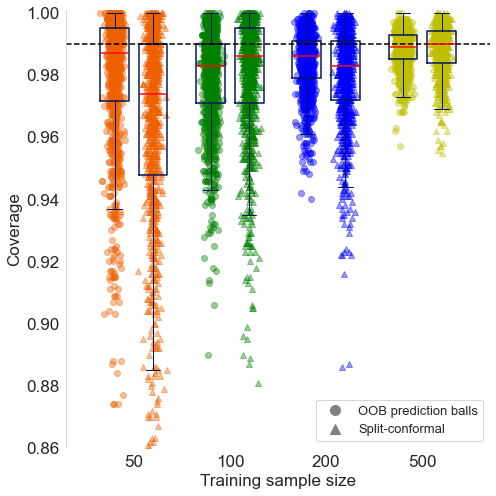

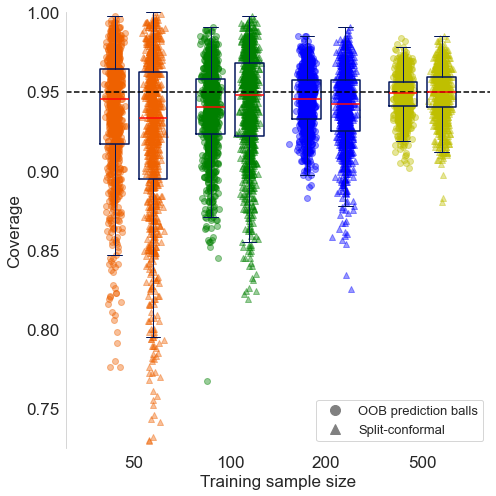

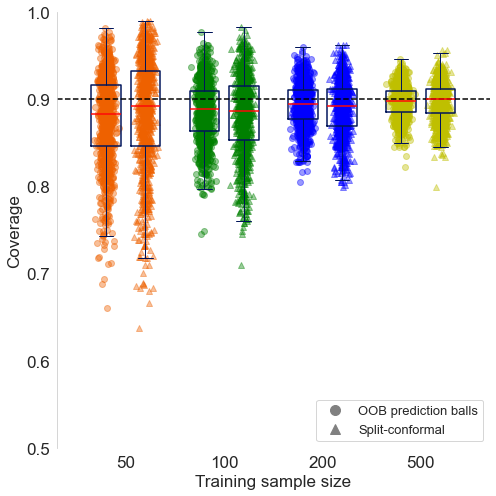

In [20]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

##### Set style options here #####
boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
flierprops = dict(marker='o', markersize=1, linestyle='none')
whiskerprops = dict(color='#00145A')
capprops = dict(color='#00145A')
medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')

for sigma_data, alpha_level in zip(
    [ii_coverage_df_sigma_17_alpha_01, ii_coverage_df_sigma_17_alpha_05, ii_coverage_df_sigma_17_alpha_1], 
    [0.01, 0.05, 0.1]
):
    fig = plt.figure(facecolor="white", figsize=(7, 7))
    ax = fig.add_subplot(111)

    # Extract data for each training size
    train_sizes = [50, 100, 200, 500]
    pb_sigma_boxplot_data = [sigma_data[sigma_data['train_size'] == size]['pb_ii_cov'].values for size in train_sizes]
    conf_sigma_boxplot_data = [sigma_data[sigma_data['train_size'] == size]['conf_ii_cov'].values for size in train_sizes]

    # Create boxplots with adjusted positions
    pb_positions_sigma = np.array(range(len(train_sizes))) - 0.2
    conf_positions_sigma = np.array(range(len(train_sizes))) + 0.2

    ax.boxplot(pb_sigma_boxplot_data, positions=pb_positions_sigma, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               flierprops=dict(marker='o', markersize=1, linestyle='none'), 
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False, showfliers=False)
               
    ax.boxplot(conf_sigma_boxplot_data, positions=conf_positions_sigma, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               flierprops=dict(marker='o', markersize=1, linestyle='none'), 
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False, showfliers=False)

    # Scatter plot
    pb_palette_sigma = ['#ee6100', 'g', 'b', 'y']
    conf_palette_sigma = ['#ee6100', 'g', 'b', 'y']

    for i, size in enumerate(train_sizes):
        pb_xs_sigma = np.random.normal(pb_positions_sigma[i], 0.04, len(pb_sigma_boxplot_data[i]))
        conf_xs_sigma = np.random.normal(conf_positions_sigma[i], 0.04, len(conf_sigma_boxplot_data[i]))

        ax.scatter(pb_xs_sigma, pb_sigma_boxplot_data[i], alpha=0.4, color = pb_palette_sigma[i], label='Prediction balls')
        ax.scatter(conf_xs_sigma, conf_sigma_boxplot_data[i], alpha=0.4, color = conf_palette_sigma[i], marker='^', label='Split-conformal')

    sns.despine(bottom=True)  # Remove right and top axis lines
    sns.set_style("whitegrid")
    ax.set_xticks(range(len(train_sizes)))
    ax.set_xticklabels([str(size) for size in train_sizes], fontsize=17)

    if alpha_level == 0.01:
        ax.set_ylim(0.86, 1.001)
    elif alpha_level == 0.05:
        ax.set_ylim(0.725, 1)
    else:
        ax.set_ylim(0.5, 1)

    ax.set_xlabel('Training sample size', fontsize=17)
    ax.set_ylabel('Coverage', fontsize=17)
    ax.tick_params(labelsize=17)
    ax.axhline(y=1-alpha_level, color='black', linestyle='dashed')
    ax.grid(False)

    # Custom legend
    #legend_handles = [
    #    mpatches.Patch(color=palette[j], label=f'Train Size: {train_sizes[j]}')
    #    for j in range(len(train_sizes))
    #]

    legend_handles = []
        
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='o', linestyle='none', markersize=10, label='OOB prediction balls'))
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='^', linestyle='none', markersize=10, label='Split-conformal'))
    ax.legend(handles=legend_handles, loc='lower right', fontsize=13)

    fig.tight_layout()
    filename = os.path.join(os.getcwd(), f'pb_vs_conf_sigma_17_vs_II_coverage_{str(alpha_level)[2:]}.png')
    fig.savefig(filename, bbox_inches='tight', dpi = 75, format='png', transparent=True)
    plt.show()

# TYPE III

In [23]:
import pandas as pd
import numpy as np

def calculate_type_iii_coverage(coverage_df, sample_sizes, sigma_values, B=500, random_seed=1):
    """
    Calculate Type III coverage using bootstrap procedure.

    Parameters:
    -----------
    pb_coverage_df : DataFrame
        Coverage results dataframe
    sample_sizes : list
        List of sample sizes to analyze
    kappa_values : list
        List of kappa values to analyze
    B : int
        Number of bootstrap replicates (default: 1000)
    
    Returns:
    --------
    dict : Bootstrap results with means and standard deviations
    """

    if random_seed is not None:
        np.random.seed(random_seed)

    pb_diccionario_iii = {
        'sigma_0.9': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '500': {'means': np.zeros(3), 'stds': np.zeros(3)}},
        'sigma_1.7': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '500': {'means': np.zeros(3), 'stds': np.zeros(3)}}
    }

    conf_diccionario_iii = {
        'sigma_0.9': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                     '500': {'means': np.zeros(3), 'stds': np.zeros(3)}},
        'sigma_1.7': {'50': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '100': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '200': {'means': np.zeros(3), 'stds': np.zeros(3)}, 
                      '500': {'means': np.zeros(3), 'stds': np.zeros(3)}}
    }

    for N in sample_sizes:
        for sigma in sigma_values:
            print(f"Processing N={N}, sigma={sigma}")

            # Filter data for current N and sigma
            coverage_df_N_sigma = coverage_df[
                (coverage_df['sigma'] == str(sigma)) & 
                (coverage_df['train_size'] == N)
            ]

            # Get M (number of samples for this N, sigma combination) and assert it is 1000
            M = len(coverage_df_N_sigma)
            print(M)
            #assert M == 1000, f"Expected M to be 1000, but got {M} for N={N}, sigma={sigma}"

            pb_coverages = []
            conf_coverages = []

            for m in range(M):
                # Extract row j_m^(b) of the dataset (training sample)
                training_sample_idx = m
                training_sample = coverage_df_N_sigma.iloc[training_sample_idx]

                # Extract element i_m^(b) from the i_cov column (test pair)
                test_pair_idx = m
                pb_coverage_for_this_pair = training_sample['pb_iii_cov'][test_pair_idx, :]  # Shape: (3,)
                conf_coverage_for_this_pair = training_sample['conf_iii_cov'][test_pair_idx, :]  # Shape: (3,)

                pb_coverages.append(pb_coverage_for_this_pair)
                conf_coverages.append(conf_coverage_for_this_pair)

            pb_coverages = np.array(pb_coverages)  # Shape: (M, 3)
            conf_coverages = np.array(conf_coverages)  # Shape: (M, 3)

            p_hat_M = np.mean(pb_coverages, axis=0)  # Shape: (3,)
            conf_hat_M = np.mean(conf_coverages, axis=0)  # Shape:


            # Bootstrap procedure
            pb_bootstrap_estimates = []  # Will store B bootstrap estimates
            conf_bootstrap_estimates = []
            
            for b in range(B):
                # Sample M indices for test pairs (i_1^(b), ..., i_M^(b))
                i_indices = np.random.choice(M, size=M, replace=True)
                
                # Sample M indices for training samples (j_1^(b), ..., j_M^(b))
                j_indices = np.random.choice(M, size=M, replace=True)
                
                # Extract bootstrap sample
                pb_bootstrap_coverages = []
                conf_bootstrap_coverages = []

                for m in range(M):
                    # Extract row j_m^(b) of the dataset (training sample)
                    training_sample_idx = j_indices[m]
                    training_sample = coverage_df_N_sigma.iloc[training_sample_idx]

                    # Extract element i_m^(b) from the i_cov column (test pair)
                    test_pair_idx = i_indices[m]
                    pb_coverage_for_this_pair = training_sample['pb_iii_cov'][test_pair_idx, :]  # Shape: (3,)
                    conf_coverage_for_this_pair = training_sample['conf_iii_cov'][test_pair_idx, :]  # Shape: (3,)

                    pb_bootstrap_coverages.append(pb_coverage_for_this_pair)
                    conf_bootstrap_coverages.append(conf_coverage_for_this_pair)

                # Convert to array and compute mean across the M bootstrap samples
                pb_bootstrap_coverages = np.array(pb_bootstrap_coverages)  # Shape: (M, 3)
                p_hat_M_b = np.mean(pb_bootstrap_coverages, axis=0)  # Shape: (3,)

                conf_bootstrap_coverages = np.array(conf_bootstrap_coverages)  # Shape: (M, 3)
                conf_hat_M_b = np.mean(conf_bootstrap_coverages, axis=0)
                
                pb_bootstrap_estimates.append(p_hat_M_b)
                conf_bootstrap_estimates.append(conf_hat_M_b)

            # Convert bootstrap estimates to array
            pb_bootstrap_estimates = np.array(pb_bootstrap_estimates)  # Shape: (B, 3)
            conf_bootstrap_estimates = np.array(conf_bootstrap_estimates)  # Shape: (B, 3


            # Compute overall mean and standard deviation
            #p_bar_M = np.mean(pb_bootstrap_estimates, axis=0)  # Shape: (3,)
            sigma_boot = np.std(pb_bootstrap_estimates, axis=0, ddof=1)  # Shape: (3,)

            #conf_bar_M = np.mean(conf_bootstrap_estimates, axis=0)  # Shape: (3,)
            conf_sigma_boot = np.std(conf_bootstrap_estimates, axis=0, ddof=1)  # Shape: (3,)

            # Store results
            sigma_key = f'sigma_{sigma}'
            N_key = str(N)
            pb_diccionario_iii[sigma_key][N_key]['means'] = p_hat_M
            pb_diccionario_iii[sigma_key][N_key]['stds'] = sigma_boot

            conf_diccionario_iii[sigma_key][N_key]['means'] = conf_hat_M
            conf_diccionario_iii[sigma_key][N_key]['stds'] = conf_sigma_boot
            # Print results
            print(f"PB Bootstrap means: {p_hat_M}")
            print(f"PB Bootstrap stds: {sigma_boot}")

            print(f"Conformal means: {conf_hat_M}")
            print(f"Conformal stds: {conf_sigma_boot}")

    return pb_diccionario_iii, conf_diccionario_iii

# Usage
sample_sizes = [50, 100, 200, 500]
sigma_values = [0.9, 1.7]  # Concentration parameters

pb_diccionario_iii, conf_diccionario_iii = calculate_type_iii_coverage(
    coverage_df=coverage_df, 
    sample_sizes=sample_sizes, 
    sigma_values=sigma_values,
    B=500,  # Number of bootstrap replicates
    random_seed=1  # Optional: set a random seed for reproducibility
)

Processing N=50, sigma=0.9
1000
PB Bootstrap means: [0.991 0.962 0.918]
PB Bootstrap stds: [0.00310084 0.00605303 0.009153  ]
Conformal means: [0.983 0.951 0.928]
Conformal stds: [0.00396053 0.00640441 0.00801714]
Processing N=50, sigma=1.7
1000
PB Bootstrap means: [0.987 0.949 0.891]
PB Bootstrap stds: [0.0039016  0.00690353 0.00967345]
Conformal means: [0.97  0.937 0.91 ]
Conformal stds: [0.00522535 0.00794633 0.00975706]
Processing N=100, sigma=0.9
1000
PB Bootstrap means: [0.988 0.95  0.91 ]
PB Bootstrap stds: [0.00330864 0.00611169 0.00859631]
Conformal means: [0.99  0.962 0.918]
Conformal stds: [0.00300005 0.00559053 0.00822121]
Processing N=100, sigma=1.7
1000
PB Bootstrap means: [0.984 0.946 0.898]
PB Bootstrap stds: [0.00420789 0.00688843 0.00943552]
Conformal means: [0.985 0.954 0.896]
Conformal stds: [0.00389218 0.0066382  0.00966915]
Processing N=200, sigma=0.9
1000
PB Bootstrap means: [0.986 0.95  0.91 ]
PB Bootstrap stds: [0.00325416 0.00686131 0.0091401 ]
Conformal means

Prediction balls

In [24]:
# Prepare data for the DataFrame
pb_rows = []
index = []

for sigma in [0.9, 1.7]:
    for N in [50, 100, 200, 500]:
        pb_row = []
        pb_means = pb_diccionario_iii[f'sigma_{sigma}'][str(N)]['means']
        pb_stds = pb_diccionario_iii[f'sigma_{sigma}'][str(N)]['stds']
        # Format as "mean (std)"
        pb_formatted_values = [f"{100*pb_means[i]:.1f} ({100*pb_stds[i]:.2f})" for i in range(3)]
        pb_row.extend(pb_formatted_values)
        pb_rows.append(pb_row)
        index.append((f"{sigma}", f"{N}"))

# MultiIndex for rows and columns
row_index = pd.MultiIndex.from_tuples(index, names=["sigma", "N"])
col_index = pd.MultiIndex.from_product(
    [["0.01", "0.05", "0.1"]],
    names=[r"Significance Level"]
)

# Create the DataFrame
pb_df = pd.DataFrame(pb_rows, index=row_index, columns=col_index)

# Display the DataFrame
pb_df

Significance Level         0.01         0.05          0.1
sigma N                                                  
0.9   50            99.1 (0.31)  96.2 (0.61)  91.8 (0.92)
      100           98.8 (0.33)  95.0 (0.61)  91.0 (0.86)
      200           98.6 (0.33)  95.0 (0.69)  91.0 (0.91)
      500           99.4 (0.29)  95.4 (0.64)  91.6 (0.95)
1.7   50            98.7 (0.39)  94.9 (0.69)  89.1 (0.97)
      100           98.4 (0.42)  94.6 (0.69)  89.8 (0.94)
      200           99.2 (0.30)  96.7 (0.63)  90.5 (0.95)
      500           98.8 (0.37)  94.3 (0.71)  90.5 (0.93)

In [25]:
# Define target coverage values that correspond to each column
# Column 0 (0.01): 0.99, Column 1 (0.05): 0.95, Column 2 (0.1): 0.90
target_coverages = [0.99, 0.95, 0.90]

# Apply formatting with column-specific target coverage
pb_latex = pb_df.copy()
for col_idx, col in enumerate(pb_df.columns):
    # Use the target coverage corresponding to this column
    target_coverage = target_coverages[col_idx]
    
    for row_idx in pb_df.index:
        pb_latex.loc[row_idx, col] = format_cell(
            pb_df.loc[row_idx, col], 
            target_coverage=target_coverage, 
            n_trials=1000
        )

pb_latex

Significance Level         0.01                     0.05  \
sigma N                                                    
0.9   50            99.1 (0.31)              96.2 (0.61)   
      100           98.8 (0.33)              95.0 (0.61)   
      200           98.6 (0.33)              95.0 (0.69)   
      500           99.4 (0.29)              95.4 (0.64)   
1.7   50            98.7 (0.39)              94.9 (0.69)   
      100           98.4 (0.42)              94.6 (0.69)   
      200           99.2 (0.30)  \underline{96.7} (0.63)   
      500           98.8 (0.37)              94.3 (0.71)   

Significance Level                      0.1  
sigma N                                      
0.9   50            \underline{91.8} (0.92)  
      100                       91.0 (0.86)  
      200                       91.0 (0.91)  
      500                       91.6 (0.95)  
1.7   50                        89.1 (0.97)  
      100                       89.8 (0.94)  
      200                       90.5 (0.95)  
      500                       90.5 (0.93)

In [26]:
print(pb_latex.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type III error', label='tab:pbtypeIIIerrorcoverage'))

\begin{table}
\caption{Type III error}
\label{tab:pbtypeIIIerrorcoverage}
\begin{tabular}{lllll}
\toprule
 & Significance Level & ('0.01',) & ('0.05',) & ('0.1',) \\
sigma & N &  &  &  \\
\midrule
\multirow[t]{4}{*}{0.9} & 50 & 99.1 (0.31) & 96.2 (0.61) & \underline{91.8} (0.92) \\
 & 100 & 98.8 (0.33) & 95.0 (0.61) & 91.0 (0.86) \\
 & 200 & 98.6 (0.33) & 95.0 (0.69) & 91.0 (0.91) \\
 & 500 & 99.4 (0.29) & 95.4 (0.64) & 91.6 (0.95) \\
\cline{1-5}
\multirow[t]{4}{*}{1.7} & 50 & 98.7 (0.39) & 94.9 (0.69) & 89.1 (0.97) \\
 & 100 & 98.4 (0.42) & 94.6 (0.69) & 89.8 (0.94) \\
 & 200 & 99.2 (0.30) & \underline{96.7} (0.63) & 90.5 (0.95) \\
 & 500 & 98.8 (0.37) & 94.3 (0.71) & 90.5 (0.93) \\
\cline{1-5}
\bottomrule
\end{tabular}
\end{table}



Split-conformal

In [27]:
# Prepare data for the DataFrame
conf_rows = []
index = []

for sigma in [0.9, 1.7]:
    for N in [50, 100, 200, 500]:
        conf_row = []
        conf_means = conf_diccionario_iii[f'sigma_{sigma}'][str(N)]['means']
        conf_stds = conf_diccionario_iii[f'sigma_{sigma}'][str(N)]['stds']
        # Format as "mean (std)"
        conf_formatted_values = [f"{100*conf_means[i]:.1f} ({100*conf_stds[i]:.2f})" for i in range(3)]
        conf_row.extend(conf_formatted_values)
        conf_rows.append(conf_row)
        index.append((f"{sigma}", f"{N}"))

# MultiIndex for rows and columns
row_index = pd.MultiIndex.from_tuples(index, names=["sigma", "N"])
col_index = pd.MultiIndex.from_product(
    [["0.01", "0.05", "0.1"]],
    names=[r"Significance Level"]
)

# Create the DataFrame
conf_df = pd.DataFrame(conf_rows, index=row_index, columns=col_index)

# Display the DataFrame
conf_df

Significance Level         0.01         0.05          0.1
sigma N                                                  
0.9   50            98.3 (0.40)  95.1 (0.64)  92.8 (0.80)
      100           99.0 (0.30)  96.2 (0.56)  91.8 (0.82)
      200           99.0 (0.36)  95.3 (0.65)  90.7 (0.90)
      500           99.3 (0.31)  95.6 (0.64)  90.3 (0.93)
1.7   50            97.0 (0.52)  93.7 (0.79)  91.0 (0.98)
      100           98.5 (0.39)  95.4 (0.66)  89.6 (0.97)
      200           99.0 (0.34)  95.5 (0.67)  90.8 (0.94)
      500           99.0 (0.35)  94.7 (0.67)  91.1 (0.90)

In [ ]:
# Apply formatting with column-specific target coverage
conf_latex = conf_df.copy()
for col_idx, col in enumerate(conf_df.columns):
    # Use the target coverage corresponding to this column
    target_coverage = target_coverages[col_idx]
    
    for row_idx in conf_df.index:
        conf_latex.loc[row_idx, col] = format_cell(
            conf_df.loc[row_idx, col],
            target_coverage=target_coverage,
            n_trials=1000
        )

conf_latex

Significance Level                     0.01         0.05  \
sigma N                                                    
0.9   50                        98.3 (0.40)  95.1 (0.64)   
      100                       99.0 (0.30)  96.2 (0.56)   
      200                       99.0 (0.36)  95.3 (0.65)   
      500                       99.3 (0.31)  95.6 (0.64)   
1.7   50            \underline{97.0} (0.52)  93.7 (0.79)   
      100                       98.5 (0.39)  95.4 (0.66)   
      200                       99.0 (0.34)  95.5 (0.67)   
      500                       99.0 (0.35)  94.7 (0.67)   

Significance Level                      0.1  
sigma N                                      
0.9   50            \underline{92.8} (0.80)  
      100           \underline{91.8} (0.82)  
      200                       90.7 (0.90)  
      500                       90.3 (0.93)  
1.7   50                        91.0 (0.98)  
      100                       89.6 (0.97)  
      200                       90.8 (0.94)  
      500                       91.1 (0.90)

In [29]:
conf_latex = conf_latex.to_latex(index=True, multirow=True, multicolumn=True, multicolumn_format='c', bold_rows=False, float_format= "%.3f" , caption='Type III error', label='tab:conftypeIIIerrorcoverage')

In [30]:
print(conf_latex)

\begin{table}
\caption{Type III error}
\label{tab:conftypeIIIerrorcoverage}
\begin{tabular}{lllll}
\toprule
 & Significance Level & ('0.01',) & ('0.05',) & ('0.1',) \\
sigma & N &  &  &  \\
\midrule
\multirow[t]{4}{*}{0.9} & 50 & 98.3 (0.40) & 95.1 (0.64) & \underline{92.8} (0.80) \\
 & 100 & 99.0 (0.30) & 96.2 (0.56) & \underline{91.8} (0.82) \\
 & 200 & 99.0 (0.36) & 95.3 (0.65) & 90.7 (0.90) \\
 & 500 & 99.3 (0.31) & 95.6 (0.64) & 90.3 (0.93) \\
\cline{1-5}
\multirow[t]{4}{*}{1.7} & 50 & \underline{97.0} (0.52) & 93.7 (0.79) & 91.0 (0.98) \\
 & 100 & 98.5 (0.39) & 95.4 (0.66) & 89.6 (0.97) \\
 & 200 & 99.0 (0.34) & 95.5 (0.67) & 90.8 (0.94) \\
 & 500 & 99.0 (0.35) & 94.7 (0.67) & 91.1 (0.90) \\
\cline{1-5}
\bottomrule
\end{tabular}
\end{table}



# Type IV

### sigma 0.9

In [31]:
iv_coverage_df_sigma_09_alpha_01 = coverage_df[coverage_df['sigma'] == '0.9'].copy()
iv_coverage_df_sigma_09_alpha_05 = coverage_df[coverage_df['sigma'] == '0.9'].copy()
iv_coverage_df_sigma_09_alpha_1  = coverage_df[coverage_df['sigma'] == '0.9'].copy()

iv_coverage_df_sigma_09_alpha_01['pb_iv_cov']  = coverage_df[coverage_df['sigma'] == '0.9']['pb_iv_cov'].apply(lambda x: x[0])
iv_coverage_df_sigma_09_alpha_01['conf_iv_cov']  = coverage_df[coverage_df['sigma'] == '0.9']['conf_iv_cov'].apply(lambda x: x[0])

iv_coverage_df_sigma_09_alpha_05['pb_iv_cov']  = coverage_df[coverage_df['sigma'] == '0.9']['pb_iv_cov'].apply(lambda x: x[1])
iv_coverage_df_sigma_09_alpha_05['conf_iv_cov']  = coverage_df[coverage_df['sigma'] == '0.9']['conf_iv_cov'].apply(lambda x: x[1])

iv_coverage_df_sigma_09_alpha_1['pb_iv_cov']  = coverage_df[coverage_df['sigma'] == '0.9']['pb_iv_cov'].apply(lambda x: x[2])
iv_coverage_df_sigma_09_alpha_1['conf_iv_cov']  = coverage_df[coverage_df['sigma'] == '0.9']['conf_iv_cov'].apply(lambda x: x[2])

iv_coverage_df_sigma_09_alpha_01.head()
iv_coverage_df_sigma_09_alpha_05.head()
iv_coverage_df_sigma_09_alpha_1.head()

,sample_index,train_size,sigma,OOB_quantile,pb_i_cov,pb_ii_cov,pb_iii_cov,pb_iv_cov,conf_i_cov,conf_ii_cov,conf_iii_cov,conf_iv_cov,pb_mse,conf_mse,quantile,pb_time,conf_time
0,68,100,0.9,"[2.6799393800313505, 2.038110179736492, 1.6629...","[[True, True, True], [True, True, False], [Tru...","[0.989, 0.932, 0.857]","[[True, True, True], [True, True, True], [True...",0.901,"[[True, True, True], [True, True, True], [True...","[0.999, 0.913, 0.884]","[[True, True, True], [True, True, True], [True...",0.969,1.193827,1.502538,"[3.8947289180605167, 2.1649746473465576, 1.989...",8.561086,8.520170
4,326,200,0.9,"[2.5447629118891966, 1.7980453684145972, 1.445...","[[True, True, True], [True, True, True], [True...","[0.993, 0.942, 0.864]","[[True, True, True], [True, True, True], [True...",0.901,"[[True, True, True], [True, True, True], [True...","[0.98, 0.922, 0.893]","[[True, True, True], [True, True, True], [True...",0.931,1.014652,1.307973,"[2.5635136628194717, 1.8990523715166028, 1.722...",10.351314,10.022843
5,537,50,0.9,"[3.220619761616061, 2.4223325482665583, 1.7226...","[[True, True, True], [True, True, True], [True...","[0.996, 0.964, 0.858]","[[True, True, True], [True, True, True], [True...",0.917,"[[True, True, True], [True, True, True], [True...","[0.971, 0.963, 0.88]","[[True, True, True], [True, True, True], [True...",0.955,1.178285,1.448009,"[2.7738301933499057, 2.6348090928348924, 1.953...",10.049529,9.972960
7,216,50,0.9,"[2.873313045237741, 2.081664675712375, 2.02708...","[[True, True, True], [True, True, True], [True...","[0.989, 0.943, 0.938]","[[True, True, True], [True, True, True], [True...",0.979,"[[True, True, True], [True, True, True], [True...","[0.997, 0.979, 0.958]","[[True, True, True], [True, True, True], [True...",0.972,1.274390,1.760215,"[3.7462935189445172, 2.813659040988384, 2.5355...",9.569995,9.243333
9,834,200,0.9,"[2.7511525114672866, 2.0854814175508842, 1.656...","[[True, True, True], [True, True, True], [True...","[0.997, 0.959, 0.894]","[[True, True, True], [True, True, True], [True...",0.923,"[[True, True, True], [True, True, True], [True...","[0.995, 0.979, 0.911]","[[True, True, True], [True, True, True], [True...",0.977,0.999896,1.341235,"[3.0992793496058813, 2.6819235044601584, 2.109...",9.734164,9.150361


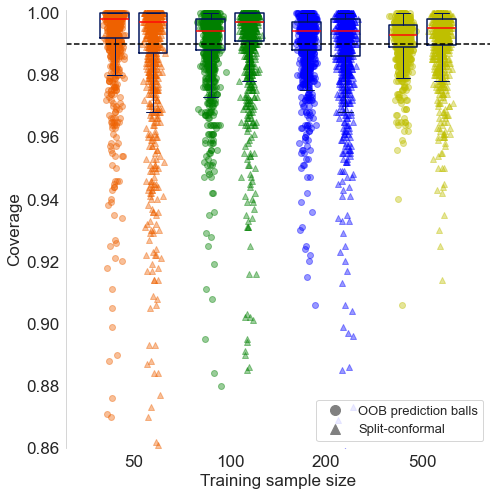

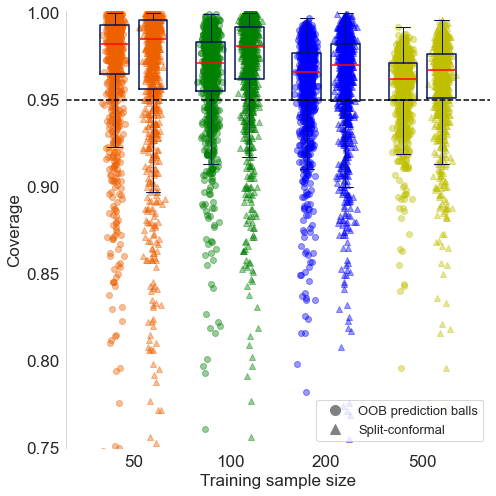

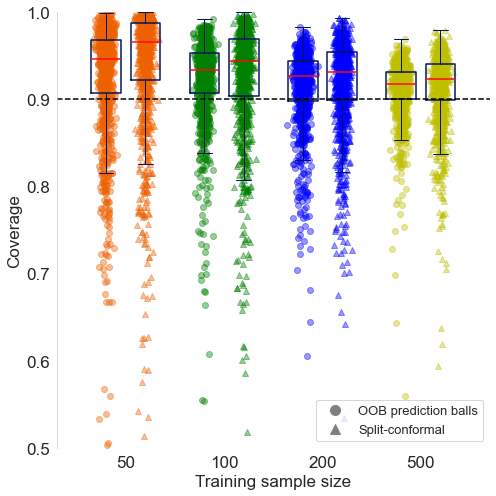

In [32]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

##### Set style options here #####
boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
flierprops = dict(marker='o', markersize=1, linestyle='none')
whiskerprops = dict(color='#00145A')
capprops = dict(color='#00145A')
medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')

for sigma_data, alpha_level in zip(
    [iv_coverage_df_sigma_09_alpha_01, iv_coverage_df_sigma_09_alpha_05, iv_coverage_df_sigma_09_alpha_1], 
    [0.01, 0.05, 0.1]
):
    fig = plt.figure(facecolor="white", figsize=(7, 7))
    ax = fig.add_subplot(111)

    # Extract data for each training size
    train_sizes = [50, 100, 200, 500]
    pb_sigma_boxplot_data = [sigma_data[sigma_data['train_size'] == size]['pb_iv_cov'].values for size in train_sizes]
    conf_sigma_boxplot_data = [sigma_data[sigma_data['train_size'] == size]['conf_iv_cov'].values for size in train_sizes]

    # Create boxplots with adjusted positions
    pb_positions_sigma = np.array(range(len(train_sizes))) - 0.2
    conf_positions_sigma = np.array(range(len(train_sizes))) + 0.2

    ax.boxplot(pb_sigma_boxplot_data, positions=pb_positions_sigma, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               flierprops=dict(marker='o', markersize=1, linestyle='none'), 
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False, showfliers=False)
               
    ax.boxplot(conf_sigma_boxplot_data, positions=conf_positions_sigma, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               flierprops=dict(marker='o', markersize=1, linestyle='none'), 
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False, showfliers=False)

    # Scatter plot
    pb_palette_sigma = ['#ee6100', 'g', 'b', 'y']
    conf_palette_sigma = ['#ee6100', 'g', 'b', 'y']

    for i, size in enumerate(train_sizes):
        pb_xs_sigma = np.random.normal(pb_positions_sigma[i], 0.04, len(pb_sigma_boxplot_data[i]))
        conf_xs_sigma = np.random.normal(conf_positions_sigma[i], 0.04, len(conf_sigma_boxplot_data[i]))

        ax.scatter(pb_xs_sigma, pb_sigma_boxplot_data[i], alpha=0.4, color = pb_palette_sigma[i], label='Prediction balls')
        ax.scatter(conf_xs_sigma, conf_sigma_boxplot_data[i], alpha=0.4, color = conf_palette_sigma[i], marker='^', label='Split-conformal')

    sns.despine(bottom=True)  # Remove right and top axis lines

    ax.set_xticks(range(len(train_sizes)))
    ax.set_xticklabels([str(size) for size in train_sizes], fontsize=17)

    if alpha_level == 0.01:
        ax.set_ylim(0.86, 1.001)
    elif alpha_level == 0.05:
        ax.set_ylim(0.75, 1.001)
    else:
        ax.set_ylim(0.5, 1)

    ax.set_xlabel('Training sample size', fontsize=17)
    ax.set_ylabel('Coverage', fontsize=17)
    ax.tick_params(labelsize=17)
    ax.axhline(y=1-alpha_level, color='black', linestyle='dashed')
    ax.grid(False)

    # Custom legend
  #  legend_handles = [
  #      mpatches.Patch(color=palette[j], label=f'Train Size: {train_sizes[j]}')
  #      for j in range(len(train_sizes))
  #  ]

    legend_handles = []
        
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='o', linestyle='none', markersize=10, label='OOB prediction balls'))
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='^', linestyle='none', markersize=10, label='Split-conformal'))
    ax.legend(handles=legend_handles, loc='lower right', fontsize=13)
    
    fig.tight_layout()
    filename = os.path.join(os.getcwd(), f'pb_vs_conf_sigma_09_vs_IV_coverage_{str(alpha_level)[2:]}.png')
    fig.savefig(filename, bbox_inches='tight', format='png', dpi = 75, transparent=True)
    plt.show()

### sigma 1.7

In [33]:
iv_coverage_df_sigma_17_alpha_01 = coverage_df[coverage_df['sigma'] == '1.7'].copy()
iv_coverage_df_sigma_17_alpha_05 = coverage_df[coverage_df['sigma'] == '1.7'].copy()
iv_coverage_df_sigma_17_alpha_1  = coverage_df[coverage_df['sigma'] == '1.7'].copy()

iv_coverage_df_sigma_17_alpha_01['pb_iv_cov']  = coverage_df[coverage_df['sigma'] == '1.7']['pb_iv_cov'].apply(lambda x: x[0])
iv_coverage_df_sigma_17_alpha_01['conf_iv_cov']  = coverage_df[coverage_df['sigma'] == '1.7']['conf_iv_cov'].apply(lambda x: x[0])

iv_coverage_df_sigma_17_alpha_05['pb_iv_cov']  = coverage_df[coverage_df['sigma'] == '1.7']['pb_iv_cov'].apply(lambda x: x[1])
iv_coverage_df_sigma_17_alpha_05['conf_iv_cov']  = coverage_df[coverage_df['sigma'] == '1.7']['conf_iv_cov'].apply(lambda x: x[1])

iv_coverage_df_sigma_17_alpha_1['pb_iv_cov']  = coverage_df[coverage_df['sigma'] == '1.7']['pb_iv_cov'].apply(lambda x: x[2])
iv_coverage_df_sigma_17_alpha_1['conf_iv_cov']  = coverage_df[coverage_df['sigma'] == '1.7']['conf_iv_cov'].apply(lambda x: x[2])

iv_coverage_df_sigma_17_alpha_01.head()
iv_coverage_df_sigma_17_alpha_05.head()
iv_coverage_df_sigma_17_alpha_1.head()

,sample_index,train_size,sigma,OOB_quantile,pb_i_cov,pb_ii_cov,pb_iii_cov,pb_iv_cov,conf_i_cov,conf_ii_cov,conf_iii_cov,conf_iv_cov,pb_mse,conf_mse,quantile,pb_time,conf_time
1,433,200,1.7,"[4.0372827735850745, 3.291036170002433, 2.9511...","[[True, True, True], [True, True, True], [True...","[0.976, 0.934, 0.902]","[[True, True, True], [True, True, True], [True...",0.846,"[[True, True, True], [True, True, True], [True...","[0.991, 0.939, 0.905]","[[True, True, True], [True, True, True], [True...",0.887,3.264532,3.298275,"[4.701241506434357, 3.4648275023892765, 3.0884...",10.399907,10.072229
2,793,50,1.7,"[3.7601024994372474, 3.27355925823164, 2.95993...","[[True, True, True], [True, True, True], [True...","[0.903, 0.857, 0.809]","[[True, True, True], [True, True, True], [True...",0.868,"[[True, True, True], [True, True, True], [True...","[0.957, 0.921, 0.888]","[[True, True, True], [True, True, True], [True...",0.890,5.018671,4.166049,"[4.12035871849366, 3.5517642526936783, 3.19981...",8.969089,8.615814
3,80,500,1.7,"[4.890836590440899, 3.7853150484200464, 2.9383...","[[True, True, True], [True, True, True], [True...","[0.992, 0.969, 0.901]","[[True, True, True], [True, True, True], [True...",0.910,"[[True, True, True], [True, True, True], [True...","[0.982, 0.971, 0.921]","[[True, True, True], [True, True, True], [True...",0.931,3.222868,3.374854,"[4.592047299907626, 4.038632696291151, 3.17308...",10.035554,9.773598
6,21,500,1.7,"[4.732109669346601, 3.5847833371791573, 2.9040...","[[True, True, True], [True, True, True], [True...","[0.995, 0.951, 0.896]","[[True, True, True], [True, True, True], [True...",0.892,"[[True, True, True], [True, True, True], [True...","[0.985, 0.958, 0.892]","[[True, True, True], [True, True, True], [True...",0.855,3.382576,3.472478,"[4.547519998475514, 3.8302192922900296, 2.9892...",11.137077,10.493369
8,492,200,1.7,"[4.776853084850832, 3.7400626662173364, 3.1222...","[[True, True, True], [True, True, True], [True...","[0.98, 0.942, 0.908]","[[True, True, True], [True, True, True], [True...",0.930,"[[True, True, True], [True, True, True], [True...","[0.973, 0.947, 0.864]","[[True, True, True], [True, True, True], [True...",0.876,3.427072,3.965002,"[4.7683385271048655, 4.069819173981432, 3.0924...",8.951375,8.598247


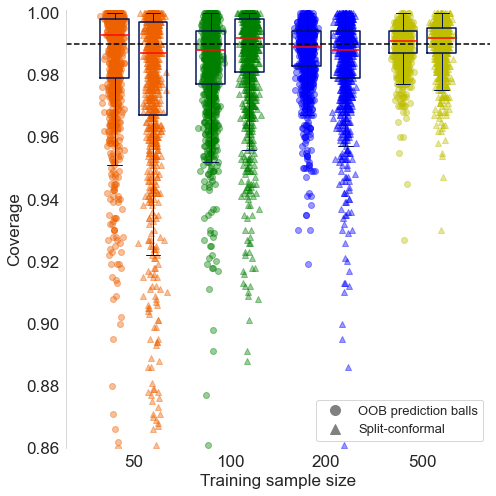

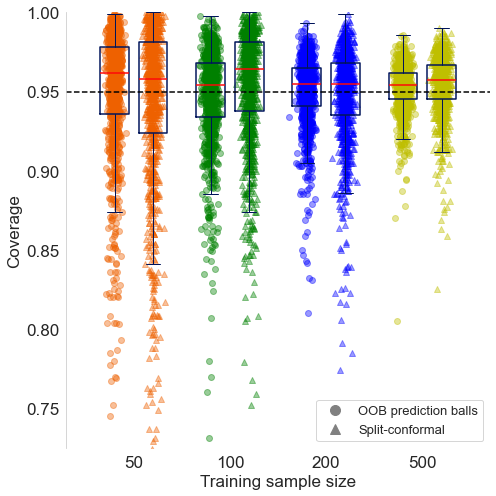

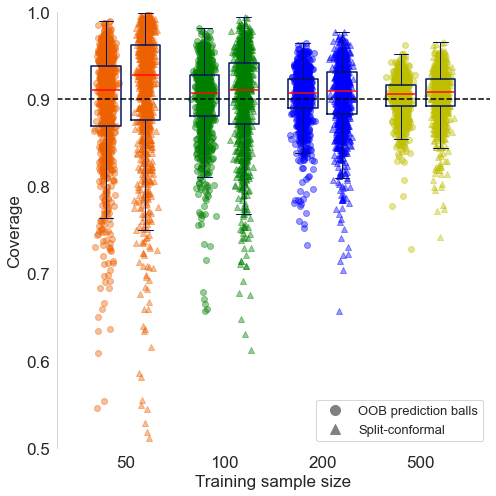

In [34]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

##### Set style options here #####
boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
flierprops = dict(marker='o', markersize=1, linestyle='none')
whiskerprops = dict(color='#00145A')
capprops = dict(color='#00145A')
medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')

for sigma_data, alpha_level in zip(
    [iv_coverage_df_sigma_17_alpha_01, iv_coverage_df_sigma_17_alpha_05, iv_coverage_df_sigma_17_alpha_1], 
    [0.01, 0.05, 0.1]
):
    fig = plt.figure(facecolor="white", figsize=(7, 7))
    ax = fig.add_subplot(111)

    # Extract data for each training size
    train_sizes = [50, 100, 200, 500]
    pb_sigma_boxplot_data = [sigma_data[sigma_data['train_size'] == size]['pb_iv_cov'].values for size in train_sizes]
    conf_sigma_boxplot_data = [sigma_data[sigma_data['train_size'] == size]['conf_iv_cov'].values for size in train_sizes]

    # Create boxplots with adjusted positions
    pb_positions_sigma = np.array(range(len(train_sizes))) - 0.2
    conf_positions_sigma = np.array(range(len(train_sizes))) + 0.2

    ax.boxplot(pb_sigma_boxplot_data, positions=pb_positions_sigma, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               flierprops=dict(marker='o', markersize=1, linestyle='none'), 
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False, showfliers=False)
               
    ax.boxplot(conf_sigma_boxplot_data, positions=conf_positions_sigma, widths=0.3, notch=False, 
               boxprops=dict(color='#00145A', linestyle='-', linewidth=1.5), 
               whiskerprops=dict(color='#00145A'), capprops=dict(color='#00145A'), 
               flierprops=dict(marker='o', markersize=1, linestyle='none'), 
               medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'), showmeans=False, showfliers=False)

    # Scatter plot
    pb_palette_sigma = ['#ee6100', 'g', 'b', 'y']
    conf_palette_sigma = ['#ee6100', 'g', 'b', 'y']

    for i, size in enumerate(train_sizes):
        pb_xs_sigma = np.random.normal(pb_positions_sigma[i], 0.04, len(pb_sigma_boxplot_data[i]))
        conf_xs_sigma = np.random.normal(conf_positions_sigma[i], 0.04, len(conf_sigma_boxplot_data[i]))

        ax.scatter(pb_xs_sigma, pb_sigma_boxplot_data[i], alpha=0.4, color = pb_palette_sigma[i], label='Prediction balls')
        ax.scatter(conf_xs_sigma, conf_sigma_boxplot_data[i], alpha=0.4, color = conf_palette_sigma[i], marker='^', label='Split-conformal')

    sns.despine(bottom=True)  # Remove right and top axis lines
    sns.set_style("whitegrid")
    ax.set_xticks(range(len(train_sizes)))
    ax.set_xticklabels([str(size) for size in train_sizes], fontsize=17)

    if alpha_level == 0.01:
        ax.set_ylim(0.86, 1.001)
    elif alpha_level == 0.05:
        ax.set_ylim(0.725, 1)
    else:
        ax.set_ylim(0.5, 1)

    ax.set_xlabel('Training sample size', fontsize=17)
    ax.set_ylabel('Coverage', fontsize=17)
    ax.tick_params(labelsize=17)
    ax.axhline(y=1-alpha_level, color='black', linestyle='dashed')
    ax.grid(False)

    # Custom legend
    #legend_handles = [
    #    mpatches.Patch(color=palette[j], label=f'Train Size: {train_sizes[j]}')
    #    for j in range(len(train_sizes))
    #]
        
    legend_handles = []
    
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='o', linestyle='none', markersize=10, label='OOB prediction balls'))
    legend_handles.append(mlines.Line2D([], [], color='gray', marker='^', linestyle='none', markersize=10, label='Split-conformal'))
    ax.legend(handles=legend_handles, loc='lower right', fontsize=13)
    
    fig.tight_layout()
    filename = os.path.join(os.getcwd(), f'pb_vs_conf_sigma_17_vs_IV_coverage_{str(alpha_level)[2:]}.png')
    fig.savefig(filename, bbox_inches='tight', dpi = 75, format='png', transparent=True)
    plt.show()

## MSE

In [37]:
# Obtain mean and sd of MSE for each method, N and sigma
zeros_init = np.zeros((1000, 3))

def calculate_mse(data, sample_sizes, sigma_values):
    pb_diccionario_mse = {
    'sigma_0.9': {'50': zeros_init, '100': zeros_init, '200': zeros_init, '500': zeros_init},
    'sigma_1.7': {'50': zeros_init, '100': zeros_init, '200': zeros_init, '500': zeros_init}
    }

    conf_diccionario_mse = {
    'sigma_0.9': {'50': zeros_init, '100': zeros_init, '200': zeros_init, '500': zeros_init},
    'sigma_1.7': {'50': zeros_init, '100': zeros_init, '200': zeros_init, '500': zeros_init}
    }

    for N in sample_sizes:
        for sigma in sigma_values:
            pb_means = []
            conf_means = []
            pb_std = []
            conf_std = []
            data_N_sigma = data[(data['sigma'] == str(sigma)) & (data['train_size'] == N)]

            pb_row_data = data_N_sigma['pb_mse']
            conf_row_data = data_N_sigma['conf_mse']
            pb_means.append(np.round(pb_row_data.mean(axis=0),2))
            conf_means.append(np.round(conf_row_data.mean(axis=0), 2))
            pb_std.append(np.round(pb_row_data.std(axis=0), 2))
            conf_std.append(conf_row_data.std(axis=0))
            pb_diccionario_mse['sigma_' + str(sigma)][str(N)] = [pb_means, pb_std]
            conf_diccionario_mse['sigma_' + str(sigma)][str(N)] = [conf_means, conf_std]

    return pb_diccionario_mse, conf_diccionario_mse

sample_sizes = [50, 100, 200, 500]  # Sample sizes
sigma_values = [0.9, 1.7]
pb_diccionario_mse, conf_diccionario_mse = calculate_mse(coverage_df, sample_sizes, sigma_values)

In [39]:
pb_diccionario_mse

{'sigma_0.9': {'50': [[1.36], [0.17]],
  '100': [[1.15], [0.11]],
  '200': [[1.02], [0.07]],
  '500': [[0.92], [0.05]]},
 'sigma_1.7': {'50': [[4.02], [0.36]],
  '100': [[3.69], [0.25]],
  '200': [[3.48], [0.19]],
  '500': [[3.29], [0.16]]}}

In [38]:
conf_diccionario_mse

{'sigma_0.9': {'50': [[1.73], [0.3362740537116678]],
  '100': [[1.38], [0.18462858377505026]],
  '200': [[1.15], [0.10445606482172072]],
  '500': [[1.0], [0.05978288920363266]]},
 'sigma_1.7': {'50': [[4.52], [0.6253385982676776]],
  '100': [[4.01], [0.3874529287579085]],
  '200': [[3.69], [0.24105677316086913]],
  '500': [[3.43], [0.17832890811379135]]}}